In [1]:

import numpy as np
import matplotlib.pyplot as plt
# If you need to import from a local utils.py, uncomment and adjust the following lines:
import sys
import os
import jax.numpy as jnp
# Construct the full path to the folder
folder_path = r'C:\Users\Petrb\Desktop\DTU\3rdSemester\02477_BAYESIAN_MACHINE_LEARNING'

# Add the folder to the Python path
sys.path.append(folder_path)

# Now you can import the utils module
from utils import *
from Task_3 import *

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

## Part 3: Binary classification

Consider the following generalized linear model for binary classification:

$$
\begin{aligned}
y_n \mid w, x_n &\sim \mathrm{Bernoulli}\bigl(\sigma(f(x_n))\bigr),\\
f(x) &= w_0 + w_1 x + w_2 x^2,\\
w &\sim \mathcal{N}(0, I),
\end{aligned}
$$
where $w = [w_0\;w_1\;w_2]^\top \in \mathbb{R}^3$, $I\in\mathbb{R}^{3\times3}$ is the identity matrix, $\sigma(\cdot)$ is the logistic sigmoid function, $x_n\in\mathbb{R}$ and $y_n\in\{0,1\}$.

Assume
$$
\hat w_{\mathrm{MAP}}
=
\begin{bmatrix}
2.647\\
-1.688\\
-0.596
\end{bmatrix}
$$
is the MAP‐estimator for $w$ given some dataset $\mathcal{D}=\{(x_n,y_n)\}_{n=1}^N$, where $y\in\mathbb{R}^N$ denotes the targets.

---

### Question 3.1
Suppose you suspect a bug in the code for computing the MAP estimator. Explain how you could verify that $\hat w_{\mathrm{MAP}}$ is indeed the correct MAP estimator.



### Question 3.2
Determine the posterior predictive distribution for $p(y^*\mid y, x^*=-3)$ using the plug‐in approximation based on the MAP estimator.

---




In [5]:
w_MAP = jnp.array([2.647, -1.688, -0.596])

sigmoid = lambda x: 1 / (1 + jnp.exp(-x))

def f(x, w):
    return w[0] + w[1] * x + w[2] * x**2

# calculate the posterior predictive probability for x* = -3 
x_star = -3.0
f_x_star = f(x_star, w_MAP)
p_y_star = sigmoid(f_x_star)
print(f"f(x* = -3) = {f_x_star:.4f}")
print(f"p(y* = 1|y, x* = -3) = {p_y_star:.4f}")
print(f"p(y* = 0|y, x* = -3) = {1 - p_y_star:.4f}")

f(x* = -3) = 2.3470
p(y* = 1|y, x* = -3) = 0.9127
p(y* = 0|y, x* = -3) = 0.0873


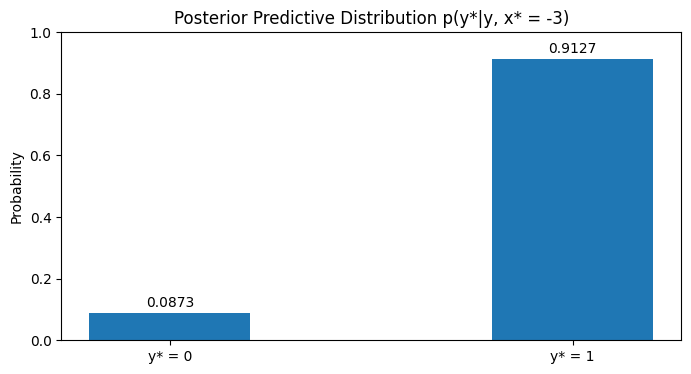

In [9]:
# Create the Bernoulli distribution
y_star_distribution = bernoulli(p_y_star)

# Visualize the distribution
plt.figure(figsize=(8, 4))
plt.bar([0, 1], [1 - p_y_star, p_y_star], width=0.4)
plt.xticks([0, 1], ['y* = 0', 'y* = 1'])
plt.ylabel('Probability')
plt.title('Posterior Predictive Distribution p(y*|y, x* = -3)')
plt.ylim(0, 1)
for i, p in enumerate([1 - p_y_star, p_y_star]):
    plt.text(i, p + 0.02, f"{p:.4f}", ha='center')

#### **ALTERNATIVE SOLUTION WHICH TAKES IN ACCOUNT THE WEIGHTS AND UNCERTANITY BUT DOES NOT GIVE THE SAME RESULT **
### Question 3.1


In [12]:
import scipy.stats as stats

# Covariance matrix S from the problem
S = np.array([
    [3.0, -0.39, -0.3],
    [-0.39, 1.55, 0.37],
    [-0.3, 0.37, 0.14]
])

# Generate samples from the posterior distribution of w
num_samples = 100000
w_samples = np.random.multivariate_normal(w_MAP, S, size=num_samples)

# Calculate p(y*=1|x*) for each sample of w
p_y_star_samples = np.array([sigmoid(f(x_star, w_sample)) for w_sample in w_samples])

# The mean gives us the marginal posterior predictive probability
p_y_star_marginal = np.mean(p_y_star_samples)

print(f"Marginal p(y* = 1|y, x* = -3) with uncertainty: {p_y_star_marginal:.4f}")

Marginal p(y* = 1|y, x* = -3) with uncertainty: 0.7930


_____
Consider now the following Gaussian approximation of the posterior distribution for the weights:

$$
p(w\mid y)\approx \mathcal{N}\bigl(w\mid \hat w_{\mathrm{MAP}}, S\bigr),
\qquad
S = 
\begin{bmatrix}
3.00 & -0.39 & -0.30\\
-0.39 & 1.55 & 0.37\\
-0.30 & 0.37 & 0.14
\end{bmatrix}.
$$

### Question 3.3
Use the Gaussian approximation to compute a 90% posterior credibility interval for $w_0$.

###### What do I need to do:
- Identify the posterior mode (the map estimate) -> this is given in the question
- Compute the curvature at the mode (The hessian at the mode) -> this is given in the question by matrix S
- Extract the marginal distribtuion for w_0 from the multivariate normal distribution -> this is done by taking the first row and column of S and the first element of w_map
- Form the 90% credibility interval using the inverse cdf of the normal distribution -> this is done by using the quantile function of the normal distribution with mean and variance from the previous step.






In [20]:
mean = w_MAP[0]
std = np.sqrt(S[0,0])
print(f"mean = {mean:.4f}, std = {std:.4f}")

w_0 = np.random.normal(mean, std, size=10**6)


print(jnp.percentile(w_0, jnp.array([5, 95])))

mean = 2.6470, std = 1.7321
[-0.20192353  5.4935603 ]


### Question 3.4
Use the Gaussian approximation to compute the approximate posterior distribution $p(f^*\mid y, x^*=-3)$ and the approximate posterior predictive distribution $$p(y^*\mid y, x^*=-3)$$ using the probit approximation.

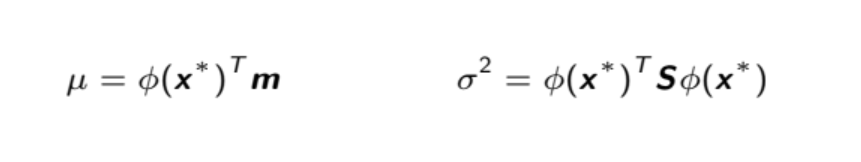

In [ ]:
# --- Question 3.4 ---
# Use the Gaussian approximation to compute the approximate posterior distribution p(f^*|y, x^*=-3)
# and the approximate posterior predictive distribution p(y^*|y, x^*=-3) using the probit approximation.

# Given:
#   - Posterior for weights: w ~ N(w_MAP, S)
#   - f(x) = w_0 + w_1 x + w_2 x^2 = phi(x)^T w, where phi(x) = [1, x, x^2]^T
#   - For a new input x*, f^* = phi(x*)^T w is also Gaussian:
#         f^* | y, x^* ~ N(mu, sigma^2)
#         mu = phi(x^*)^T w_MAP, shape: scalar
#         sigma^2 = phi(x^*)^T S phi(x^*), shape: scalar

mu = f(x_star, w_MAP)  # mean of f^* (scalar)
def phi(x):
    # Feature vector for input x, shape: (3,)
    return jnp.array([1, x, x**2])

# Compute mu = phi(x^*)^T w_MAP
print(phi(x_star).T @ w_MAP)  # shape: scalar

# Compute sigma^2 = phi(x^*)^T S phi(x^*)
sigma_2 = phi(x_star).T @ S @ phi(x_star)
print(sigma_2)  # shape: scalar

# The posterior predictive distribution for y^* is:
#   p(y^* = 1 | y, x^*) ≈ Φ(mu / sqrt(1 + sigma^2)), where Φ is the standard normal CDF (probit approximation)

2.3470001
5.2499986


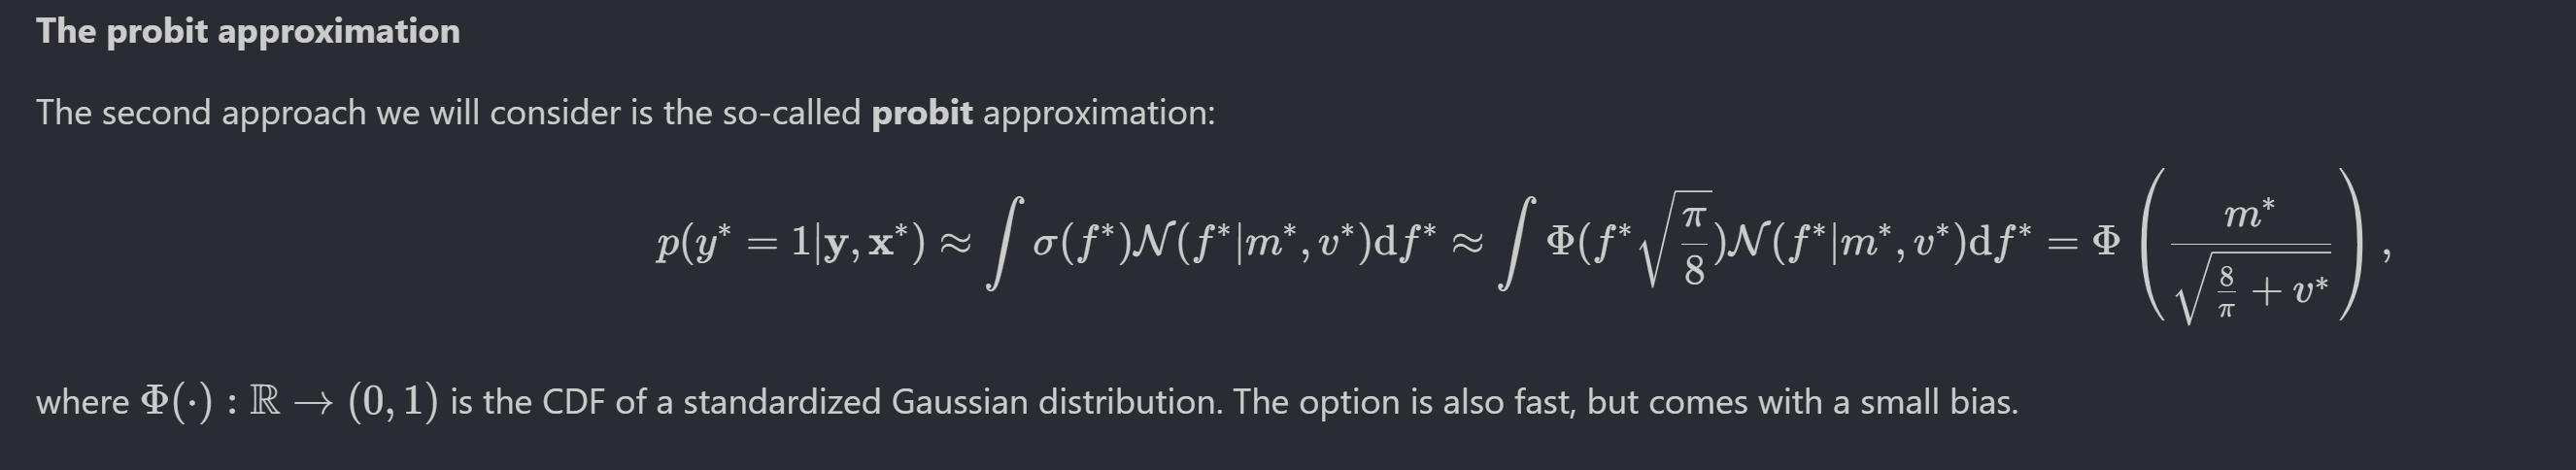

The posterior predictive distribution for y^* is:
  $p(y^* = 1 | y, x^*) ≈ Φ(\mu / \sqrt(1 + \sigma^2))$, where Φ is the standard normal CDF (probit approximation)

In [28]:
from scipy.stats import norm as norm_dist
bit = lambda x: norm_dist.cdf(x)

def probit_approx(xstar, m, v ):
    
    p = probit(m/jnp.sqrt(8/jnp.pi + v))
    
    return p

posterior_pred_prob = probit_approx(x_star, mu, sigma_2)
print(f"Posterior predictive probability p(y* = 1|y, x* = -3) using probit approximation: {posterior_pred_prob:.4f}")

Posterior predictive probability p(y* = 1|y, x* = -3) using probit approximation: 0.7997


---

Consider the following utility matrix for a decision $\hat y\in\{0,1\}$ and the true value $y\in\{0,1\}$:

$$
U(y,\hat y) =
\begin{array}{c|cc}
 & \hat y=0 & \hat y=1\\
\hline
y=0 & 2 & 1\\
y=1 & 1 & 2
\end{array}.
$$

Suppose the predictive posterior distribution for a specific $x^*$ is given by
$$
p(y^*=1\mid y, x^*) = 0.129.
$$


### Question 3.5
Compute the expected utility for each decision $\hat y\in\{0,1\}$ and determine the optimal decision with respect to the utility matrix above.

In [32]:
def compute_expected_utility(U, phat):
    """ computes the expected utility for a multi-class classification problem with K classes for utility matrix U and posterior predictive probabilities phat 
        
        Arguments
        U               --      Utility matrix (shape: [K x K])
        phat            --      Posterior predictive probabilities (shape: [P x K]), where P is the number of prediction points

        expected_util   --      Expected utility for each class for each point in phat (shape: P x K)           
           """
    

    print(U.shape)
    print(phat.shape)
    expected_util = phat @ U
    

    # check dimensions and return
    assert expected_util.shape == phat.shape, f'The variable expected_util was expected to have shape {phat.shape}, but the actual shape was {expected_util.shape}. Please check your code.'
    return expected_util

y_one = 0.129 
y_zero = 1 - y_one

U = np.array([[2, 1], [1, 2]])
phat = np.array([y_one, y_zero])


expected_unity = compute_expected_utility(U, phat)

print(expected_unity)

(2, 2)
(2,)
[1.129 1.871]


f(x* = -3) = 2.3470
p(y* = 1|y, x* = -3) = 0.9127
p(y* = 0|y, x* = -3) = 0.0873


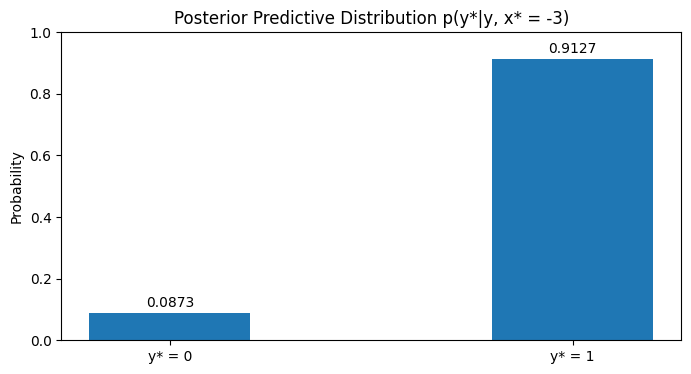

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Define the MAP estimator
w_MAP = np.array([2.647, -1.688, -0.596])

# Define the logistic sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the function f(x)
def f(x, w):
    return w[0] + w[1]*x + w[2]*x**2

# Calculate the posterior predictive probability for x* = -3
x_star = -3
f_x_star = f(x_star, w_MAP)
p_y_star_1 = sigmoid(f_x_star)

print(f"f(x* = -3) = {f_x_star:.4f}")
print(f"p(y* = 1|y, x* = -3) = {p_y_star_1:.4f}")
print(f"p(y* = 0|y, x* = -3) = {1 - p_y_star_1:.4f}")

# Create the Bernoulli distribution
y_star_distribution = bernoulli(p_y_star_1)

# Visualize the distribution
plt.figure(figsize=(8, 4))
plt.bar([0, 1], [1 - p_y_star_1, p_y_star_1], width=0.4)
plt.xticks([0, 1], ['y* = 0', 'y* = 1'])
plt.ylabel('Probability')
plt.title('Posterior Predictive Distribution p(y*|y, x* = -3)')
plt.ylim(0, 1)
for i, p in enumerate([1 - p_y_star_1, p_y_star_1]):
    plt.text(i, p + 0.02, f"{p:.4f}", ha='center')